## Calcolo del Calore specifico di Debye in diamante

Nella simulazione si calcola l'integrale di Debye. Eseguo l'integrale con $xx = T/T_D$ compreso tra 0.1 (evito lo zero) e 2 (T=2*TD) 
Noto che $xx = x_D^{-1}$, perchè l'integrale CD ne fa direttamente l'inverso al suo interno per calcolare 
il suo limite superiore.

$$C(T) = 9Nk_B \underbrace{\left(\frac{\hbar \omega_D}{k_B T}\right)^3}_{x_D^{-3}} \int_0^{x_D} \frac {x^4e^x dx}{(e^x-1)^2}  $$

<IPython.core.display.Javascript object>


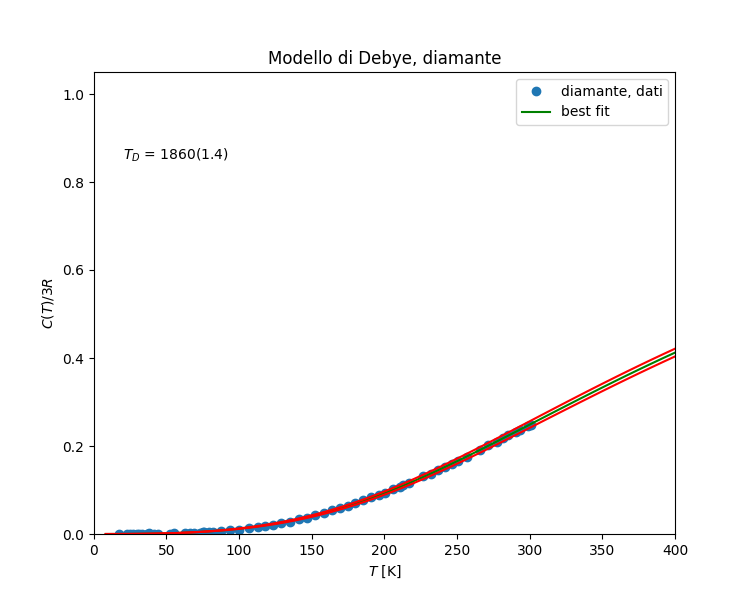

[1859.71694759] [[1.35723585]]


<ipython-input-12-66d1bc123e76>:9: RuntimeWarning: overflow encountered in exp
  return x**4*np.exp(x)/(np.exp(x)-1)**2
<ipython-input-12-66d1bc123e76>:9: RuntimeWarning: invalid value encountered in double_scalars
  return x**4*np.exp(x)/(np.exp(x)-1)**2
<ipython-input-12-66d1bc123e76>:9: RuntimeWarning: overflow encountered in double_scalars
  return x**4*np.exp(x)/(np.exp(x)-1)**2
<ipython-input-12-66d1bc123e76>:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral,err = quad(debint,0.,TD/t)
<ipython-input-12-66d1bc123e76>:9: RuntimeWarning: overflow encountered in exp
  return x**4*np.exp(x)/(np.exp(x)-1)**2
<ipython-input-12-66d1bc123e76>:9: RuntimeWarning: invalid value encountered in double_scalars
  return x**4*np.exp(x)/(np.exp(x)-1)**2
<ipython-input-12-66d1bc123e76>:9: RuntimeWarning: overflow encountered in double_scalars
  return x**4*np.exp(x)/(np

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as P
from scipy import stats
from scipy.integrate import quad
from scipy.optimize import curve_fit

def debint(x):  # calcola la funzione integrando
    return x**4*np.exp(x)/(np.exp(x)-1)**2

 
def CD(t,TD): # Calore specifio molare di Debye
    # calcola l'integrale di Debye del calore specifico E LO MOTIPLICA PER 3 T/TD ALLA TERZA!!!
    # il fattore 3 è per le tre polarizzazioni
    integral,err = quad(debint,0.,TD/t)
    return (t/TD)**3*3*integral # questa funzione accetta un solo valore di t, più il parametro TD
    # e restituisce il valore dell'integrale tra 0 e XD = TD[0]/t

vCD = np.vectorize(CD) #  la funzione vCD ora accetta un array t 
# e restituisce l'array dei valori dell'integrale

T,C = np.transpose(np.loadtxt('diamond.csv',delimiter=','))
# questi sono i dati di diamante in due array (trasposti perchè voglio due vettori riga)

C0 = 3.*8.31 # questo è il valore di Dulong&Petit per una mole
c = C/C0 # questi sono i dati di diamante normalizzati al valore di D&P

fig,ax = P.subplots(figsize=(7.5,6.0))  # creo una figura specificando le dimensioni                
ax.plot(T,c,'o',label='diamante, dati') # dati normalizzati, pallino rosso

TDguess = 1500.

p,err = curve_fit(vCD,T,c,TDguess) # least square fit

print(p,err) # l'errore non vuol dire nulla (non normalizzo il chi quadro!)
Tmax = 400. # estremo superiore del plot
N = 50 # numero di punti nella funzione ottimizzata (a tratto continuo)d
t = np.linspace(0.1,Tmax,N) # variabile temperatura per la funzione ottimizzata

ax.plot(t,vCD(t,p),'g-',label='best fit') # ottimizzata, verde, a tratto continuo
ax.set_title('Modello di Debye, diamante')
ax.set_xlabel(r'$T$ [K]')
ax.set_ylabel(r'$C(T)/3R$')
ax.text(Tmax/20,0.85,r'$T_D$ = {:.0f}({:.1f})'.format(p[0],err[0,0]))
pdef = [p[0]-20*err[0,0]]
ax.plot(t,vCD(t,pdef),'r-')
pecc = [p[0]+20*err[0,0]]
ax.plot(t,vCD(t,pecc),'r-')
ax.set_xlim(0,Tmax)
ax.set_ylim(0,1.05)
ax.legend()
P.show()
